## TD N°2 explicabilité du dataset Boston Housing

## Valorys Trillaud M2 ECAP

1) Charger le dataset bostong_housing
   1) Disponible dans le folder 04_interpretable_ml/td/data/
   
2) Nettoyer votre jeu de données pour créer une régression linéaire et un random forest
   1) Tester d'ajouter des features log, quadratique, ...

3)Créer un modèle baseline linéaire et random forest

4) Interpréter le modèle linéaire

5) Tuner votre random forest

6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

6) Réaliser une explicabilité par individu
   1) En utilisant la méthode ICE (PDP individuelle)
   2) LIME (Model local pour expliquer une prédiction)
   3) SHAP watterfall plot (Contribution marginale de chaque variable dans la prédiction)

7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

## Contexte du Dataset

Le Boston Housing Dataset est un ensemble de données couramment utilisé en apprentissage automatique et en statistique pour étudier les relations entre diverses caractéristiques socio-économiques et immobilières dans la ville de Boston.  
Il contient des informations sur des propriétés résidentielles et leur environnement, et est souvent utilisé pour prédire la valeur des maisons, un problème classique de régression.

**Variable dispo**: 
- CRIM : taux de criminalité par habitant par ville
- ZN : proportion de terrains résidentiels zonés pour des lots de plus de 25 000 pieds carrés
- INDUS : proportion de terrains commerciaux non commerciaux par ville
- CHAS : variable binaire indiquant la proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)
- NOX : concentration des oxydes d'azote (en parties par 10 millions)
- RM : nombre moyen de pièces par logement
- AGE : proportion des unités occupées par leur propriétaire et construites avant 1940
- DIS : distances pondérées vers cinq centres d'emploi de Boston
- RAD : indice d'accessibilité aux autoroutes radiales
- TAX : taux d'imposition foncière par valeur totale pour chaque tranche de 10 000 dollars
- PTRATIO : ratio élèves-enseignants par ville
- LSTAT : pourcentage de la population de statut socio-économique inférieur
- MEDV : valeur médiane des maisons occupées par leur propriétaire (en milliers de dollars) - **variable cible**

In [60]:
#Web request
import requests
import io
import pandas as pd
import numpy as np

### 1) Charger le dataset bostong_housing

In [62]:
#Télécharge directement depuis Github
url = "https://raw.githubusercontent.com/Roulitoo/cours_iae/master/04_INTERPRETABLE_ML/td/data/boston_housing.csv" 
download = requests.get(url).content

df = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=';')

In [64]:
df.sample(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
199,199,0.03150,95.0,1.47,0,0.403,6.975,15.3,7.6534,3,402.0,17.0,4.56,34.9
93,93,0.02875,28.0,15.04,0,0.464,6.211,28.9,3.6659,4,270.0,18.2,6.21,25.0
201,201,0.03445,82.5,2.03,0,0.415,6.162,38.4,6.2700,2,348.0,14.7,7.43,24.1
233,233,0.33147,0.0,6.20,0,0.507,8.247,70.4,3.6519,8,307.0,17.4,3.95,48.3
61,61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284.0,19.7,14.44,16.0
97,97,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276.0,18.0,4.21,38.7
226,226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307.0,17.4,3.13,37.6
145,145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,27.80,13.8
108,108,0.12802,0.0,8.56,0,0.520,6.474,97.1,2.4329,5,384.0,20.9,12.27,19.8
391,391,5.29305,0.0,18.10,0,0.700,6.051,82.5,2.1678,24,666.0,20.2,18.76,23.2


### 2)Nettoyer votre jeu de données pour créer une régression linéaire et un random forest

Penser à :

- Vérifier comment encoder vos variables qualitatives pour la modélisation 
- Analyser les distributions
- Analyser les outliers 
- Analyser les corrélations

>Tester d'ajouter des features log, quadratique, ...

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Suppression de la colonne Unnamed: 0 : Cette colonne correspond à un index inutile pour l’analyse.

In [68]:
df = df.drop(columns=["Unnamed: 0"])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


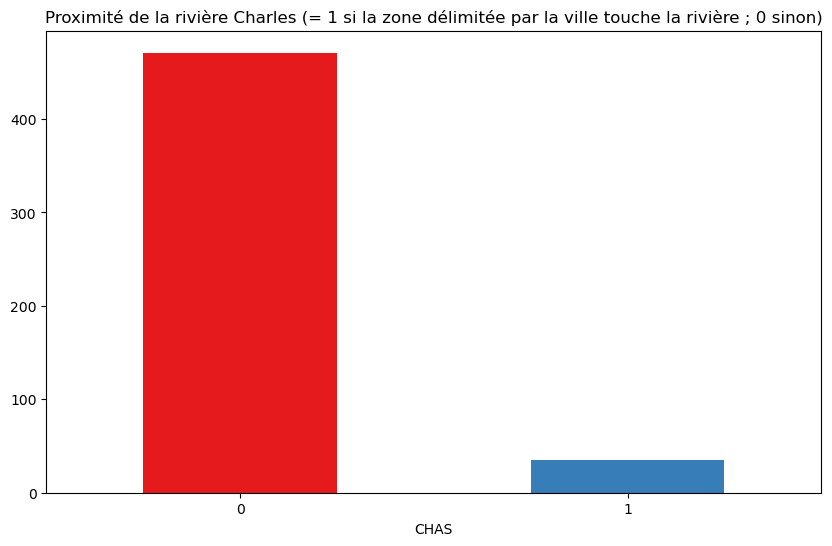

In [72]:
import matplotlib.pyplot as plt  
p = df['CHAS'].value_counts().plot(kind='bar',
                                             figsize=(10, 6),
                                             title ="Proximité de la rivière Charles (= 1 si la zone délimitée par la ville touche la rivière ; 0 sinon)",
                                             color= ["#e41a1c", "#377eb8"],
                                             rot = 0
                                             )    # Plot a bar chart
plt.show()

In [74]:
df['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [76]:
df['CHAS'].value_counts(normalize=True) * 100

CHAS
0    93.083004
1     6.916996
Name: proportion, dtype: float64

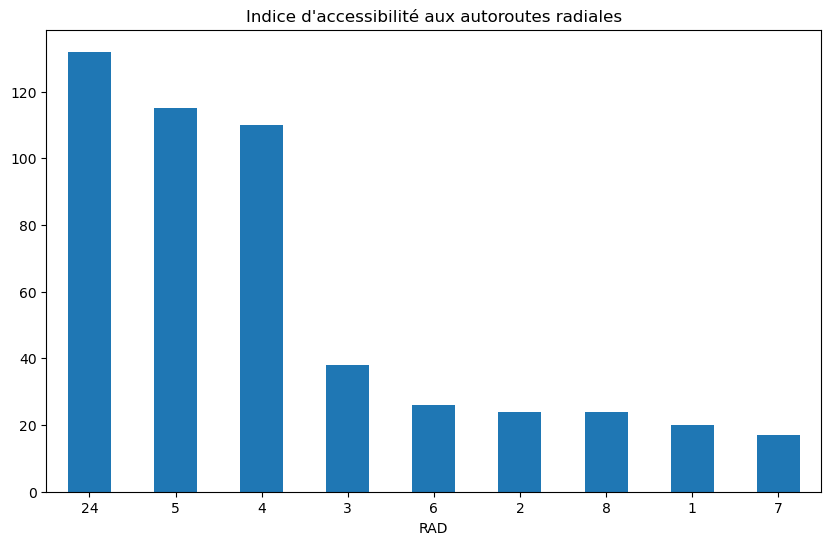

In [78]:
import matplotlib.pyplot as plt  
p = df['RAD'].value_counts().plot(kind='bar',
                                             figsize=(10, 6),
                                             title ="Indice d'accessibilité aux autoroutes radiales",
                                             rot = 0
                                             )    # Plot a bar chart
plt.show()

Conversion des variables CHAS et RAD en catégories : Ces variables sont qualitatives et doivent être traitées comme des catégories plutôt que des variables quantitatives.

In [80]:
df['CHAS'] = df['CHAS'].astype('category')
df['RAD'] = df['RAD'].astype('category')

Visualisation des distributions des variables numériques.

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>],
       [<Axes: title={'center': 'DIS'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >]], dtype=object)

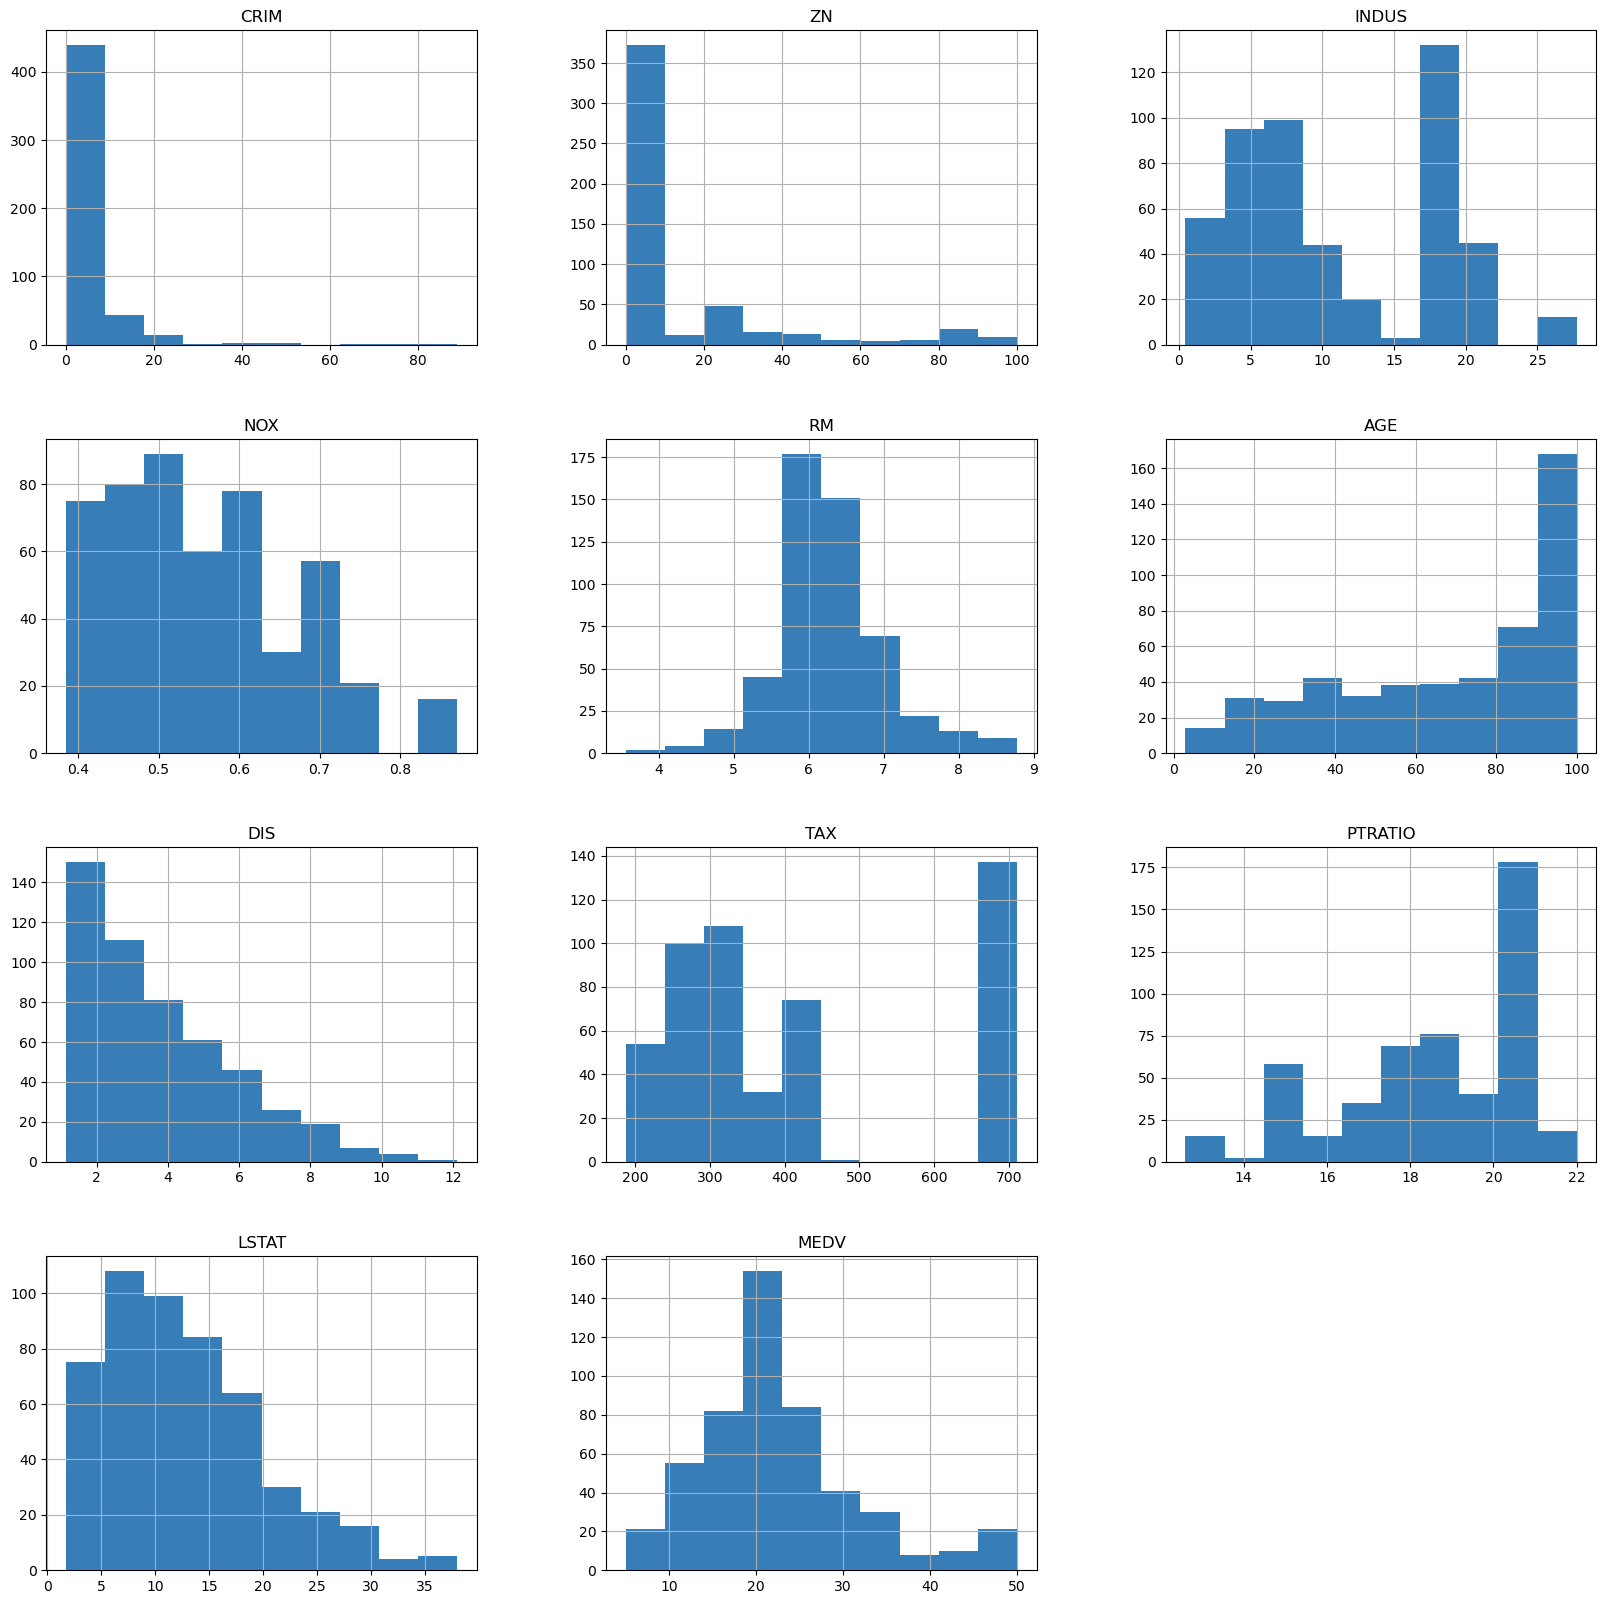

In [82]:
df.hist(figsize=(20, 20), color = "#377eb8")

J'utilise des boxplots pour détecter les valeurs aberrantes.

<Axes: >

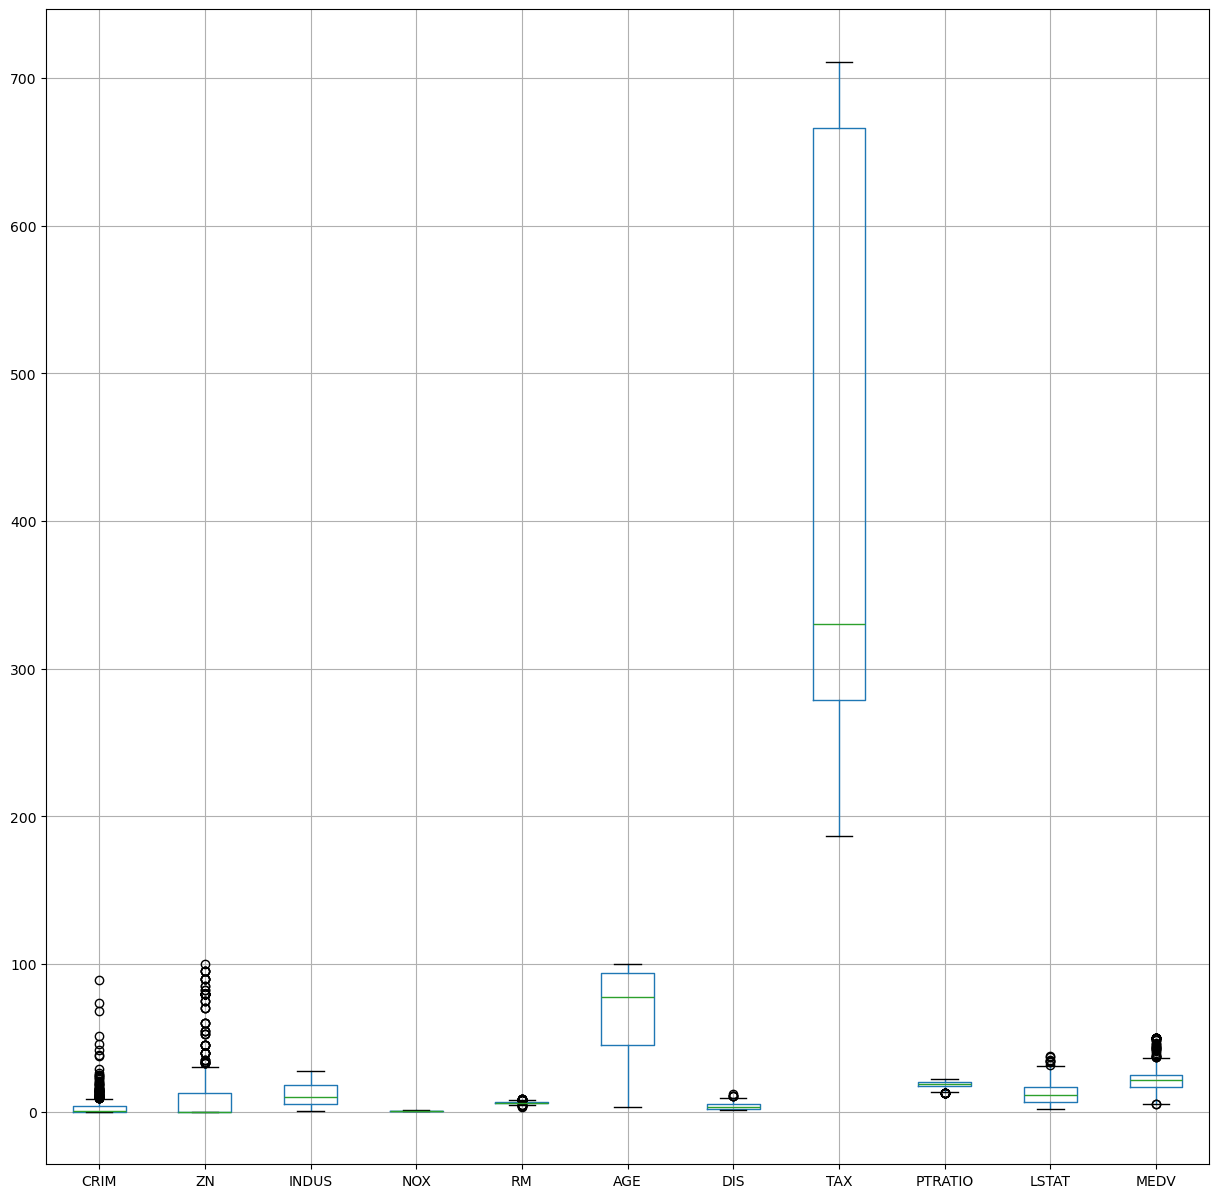

In [84]:
df.boxplot(figsize=(15, 15))

Des valeurs extrêmes sont identifiées sur les variables CRIM, ZN, LSTAT et MEDV.
La winsorisation sera appliquée pour réduire leur effet sur les modèles prédictifs.

Matrice de corrélation : l’analyse des corrélations permet d’identifier les relations linéaires entre les variables.
Aucune corrélation n’excède 0.8, ce qui signifie qu’il n’y a pas de forte multicolinéarité. Cela est important pour éviter les problèmes d’interprétation des coefficients dans une régression linéaire.

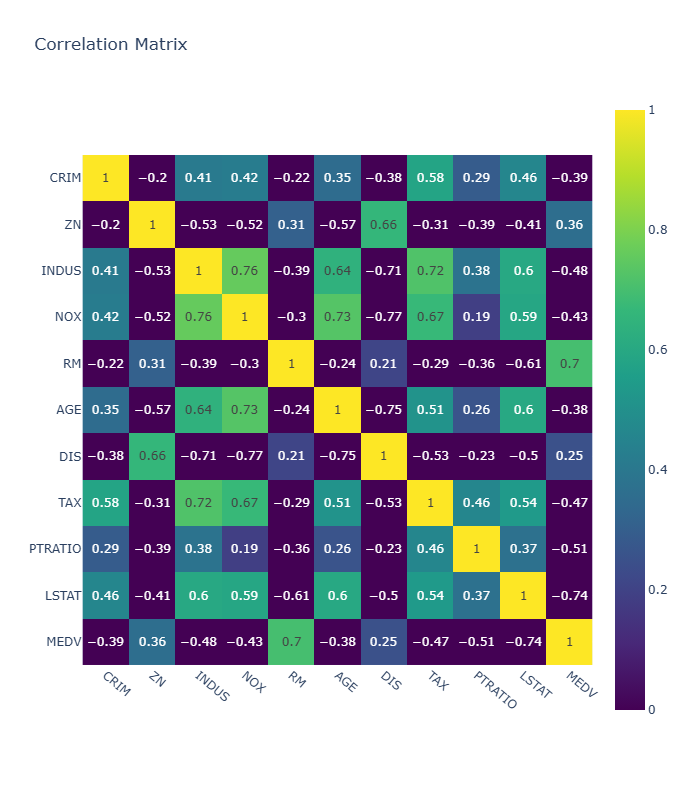

In [86]:
import plotly.express as px

correlation =  round(df.corr(numeric_only = True),  ndigits=2)

fig = px.imshow(correlation,
                text_auto=True,
                color_continuous_scale = 'Viridis',
                range_color=(0, 1),
                title='Correlation Matrix',
                width=800,
                height=800
            )

fig.update_xaxes(tickangle=40)

fig.show()

In [88]:
na = df.isna().sum() 
na.sort_values()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Le dataset ne contient pas de valeurs manquantes, donc aucune imputation n’est nécessaire.

In [90]:
def winsorize_data(xtrain, xtest, feature):
    """
    Applique la winsorisation aux données pour limiter les valeurs extrêmes.

    Parameters:
        xtrain (DataFrame): Ensemble d'entraînement.
        xtest (DataFrame): Ensemble de test.
        feature (str): Nom de la colonne à winsoriser.

    Returns:
        Tuple (Series, Series): Les colonnes winsorisées pour l'entraînement et le test.
    """
    # Vérifier que les colonnes sont bien numériques
    if not np.issubdtype(xtrain[feature].dtype, np.number):
        raise TypeError(f"La colonne {feature} doit contenir des données numériques.")

    lower_quantile = 0.05  # 5% quantile
    upper_quantile = 0.95  # 95% quantile

    # Calcul des bornes à partir des quantiles sur xtrain
    lower_bound = np.quantile(xtrain[feature], lower_quantile)
    upper_bound = np.quantile(xtrain[feature], upper_quantile)

    # Appliquer la winsorisation sur xtrain
    xtrain_winsorized = np.clip(xtrain[feature], lower_bound, upper_bound)

    # Appliquer la winsorisation sur xtest (avec les bornes de xtrain)
    xtest_winsorized = np.clip(xtest[feature], lower_bound, upper_bound)

    return xtrain_winsorized, xtest_winsorized

Les variables catégoriques CHAS et RAD sont encodées à l’aide de la fonction pd.get_dummies(). Cet encodage transforme les variables catégoriques en variables binaires, facilitant ainsi leur intégration dans les modèles d’apprentissage automatique.

In [92]:
df = pd.get_dummies(df, columns=['CHAS', 'RAD'], drop_first=True)

Les données sont ensuite divisées en deux ensembles à l’aide de train_test_split(), avec 70% des données réservées à l’entraînement et 30% aux tests. Cette séparation permet d’évaluer la performance des modèles.

In [94]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

On applique la winsorisation pour limiter l'impact des valeurs aberrantes sur les modèles prédictifs.

In [96]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f" Winsorization de la variable : {col}")
    try:
        X_train[col], X_test[col] = winsorize_data(xtrain=X_train, xtest=X_test, feature=col)
    except TypeError as e:
        print(f"Erreur pour la colonne {col} : {e}")

 Winsorization de la variable : CRIM
 Winsorization de la variable : ZN
 Winsorization de la variable : INDUS
 Winsorization de la variable : NOX
 Winsorization de la variable : RM
 Winsorization de la variable : AGE
 Winsorization de la variable : DIS
 Winsorization de la variable : TAX
 Winsorization de la variable : PTRATIO
 Winsorization de la variable : LSTAT


Une transformation logarithmique est appliquée aux variables numériques après la winsorisation afin de réduire la dispersion des variables fortement asymétriques. L’application de log(1 + X) permet d’atténuer les effets des valeurs extrêmes tout en évitant les erreurs dues à la présence de valeurs nulles. Seules les variables strictement positives sont transformées.

In [98]:
# Appliquer la transformation logarithmique après la winsorisation
for col in numeric_cols:
    if X_train[col].min() > 0:  # Vérifie que toutes les valeurs sont positives
        print(f"Transformation log de : {col}")
        X_train[col] = np.log1p(X_train[col])  # log(1 + X) pour éviter log(0)
        X_test[col] = np.log1p(X_test[col])

Transformation log de : CRIM
Transformation log de : INDUS
Transformation log de : NOX
Transformation log de : RM
Transformation log de : AGE
Transformation log de : DIS
Transformation log de : TAX
Transformation log de : PTRATIO
Transformation log de : LSTAT


Une standardisation des données est effectuée pour homogénéiser l’échelle des variables et améliorer la convergence des modèles.

In [100]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [102]:
feature_names = X_train.columns  
X_train_sc = pd.DataFrame(scaler.transform(X_train), columns=feature_names)

### 3)Créer 2 modèles baseline, linéaire et random forest

In [104]:
#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

In [106]:
from sklearn.linear_model import LinearRegression
# Création d'un modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_train_sc, y_train)
y_pred_lr = lr_model.predict(X_test_sc)

mse = mean_squared_error(y_test, y_pred_lr)
rmse =  np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)
    
# Afficher les résultats
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 17.6782
RMSE: 4.2045
R²: 0.7628


C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
# Création d'un modèle Random Forest
# On crée notre modèle
rf = RandomForestRegressor(n_estimators=500,
                            max_depth=20,
                            random_state=42)

# On entraine notre modèle
rf.fit(X_train_sc, y_train)

# On prédit les valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test_sc)

mse = mean_squared_error(y_test, y_pred)
rmse =  np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
# Afficher les résultats
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

MSE: 10.4153
RMSE: 3.2273
R²: 0.8602


C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Le modèle Random Forest est comparé à la régression linéaire pour la prédiction des prix des maisons. Les résultats montrent que Random Forest est beaucoup plus précis que la régression linéaire. En effet, le coefficient de détermination R² du Random Forest est plus élevé, tandis que l’erreur quadratique moyenne (MSE) et la racine de l’erreur quadratique moyenne (RMSE) sont plus faibles, indiquant une meilleure qualité de prédiction.

### 4) Interpréter le modèle linéaire
Utiliser les méthodes intrinsèques du modèle pour l'interprétation

In [110]:
lr_model = LinearRegression()
lr_model.fit(X_train_sc, y_train)

print(pd.DataFrame(lr_model.coef_,index=X_train.columns,columns=['coef']).sort_values(by='coef', ascending=False))


             coef
RAD_24   3.897938
RM       2.004483
RAD_5    1.292632
RAD_4    1.213925
RAD_3    1.212594
RAD_8    1.012690
RAD_7    0.822261
CHAS_1   0.753971
RAD_6    0.482845
RAD_2    0.379060
ZN       0.166555
AGE      0.065256
INDUS   -0.122327
TAX     -0.978504
NOX     -1.278058
PTRATIO -1.925447
CRIM    -2.503281
DIS     -3.298989
LSTAT   -5.552173


Les variables avec un impact positif important sont RAD_24 et RM. Tandis que les variables avec un impact négatif important sont LSTAT, DIS et CRIM.

### 5) Tuner votre random forest

In [112]:
from sklearn.model_selection import RandomizedSearchCV

parameter_grid = {
    'n_estimators': [50, 100, 150, 200, 500, 800, 1000],  # Nombre d'arbres
    'max_depth': [5, 10, 15, 20, 30, 40, 60, 80, None],  # Profondeur des arbres
    'min_samples_split': [2, 3, 5, 7, 10, 15, 20],  # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2, 3, 5, 10, 20],  # Nombre minimum d'échantillons par feuille
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7],  # Nombre maximum de caractéristiques
}


# Initialisation de RandomizedSearchCV avec plus d'itérations
gridRandom = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=parameter_grid,
    n_iter=20,  
    cv=5,  
    n_jobs=-1,
    verbose=2,
    random_state=42,
    scoring='r2')

In [114]:
gridRandom.fit(X_train_sc, y_train)

print(gridRandom.best_score_) # Meilleur score
print(gridRandom.best_params_) # Meilleurs paramètres

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.8370179002959288
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 80}


In [116]:
rf = RandomForestRegressor(n_estimators=  150,  # Nombre d'arbres
    max_depth= 80,   # Profondeur des arbres (None = pas de limite)
    min_samples_split= 2,       # Nombre min d'échantillons pour diviser un nœud
    min_samples_leaf= 1,         # Nombre min d'échantillons dans une feuille
    max_features=  0.5, 
    random_state=42)

# On entraine notre modèle
rf.fit(X_train_sc, y_train)

# On prédit les valeurs de la variable cible pour les données de test
y_pred = rf.predict(X_test_sc)

mse = mean_squared_error(y_test, y_pred)
rmse =  np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
    
# Afficher les résultats
print(f"Mean Squared Error: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

Mean Squared Error: 10.0713
RMSE: 3.1735
R²: 0.8648


C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



Pour optimiser le modèle Random Forest, une recherche des meilleurs hyperparamètres est réalisée à l’aide de RandomizedSearchCV. Après optimisation, le modèle atteint un R² de 0.8648, un RMSE de 3.1735 et un MSE de 10.0713, ce qui représente une amélioration par rapport au modèle de base.

### 6) Interpréter globalement votre modèle meilleur modèle RF 
   1) Utiliser les PDP ou ALE & Permutation feature Importance 
   2) Comparer les résulats du random forest avec votre interprétation du modèle linéaire

In [118]:
import matplotlib.pyplot as plt

Au vu de la corrélation entre les différentes variables, l'ALE est plus adapté pour l'interprétation de notre modèle.

In [120]:
X_train_sc = pd.DataFrame(X_train_sc)


C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor

array([[<Axes: xlabel='CRIM', ylabel='ALE'>,
        <Axes: xlabel='ZN', ylabel='ALE'>,
        <Axes: xlabel='INDUS', ylabel='ALE'>],
       [<Axes: xlabel='NOX', ylabel='ALE'>,
        <Axes: xlabel='RM', ylabel='ALE'>,
        <Axes: xlabel='AGE', ylabel='ALE'>],
       [<Axes: xlabel='DIS', ylabel='ALE'>,
        <Axes: xlabel='TAX', ylabel='ALE'>,
        <Axes: xlabel='PTRATIO', ylabel='ALE'>],
       [<Axes: xlabel='LSTAT', ylabel='ALE'>, None, None]], dtype=object)

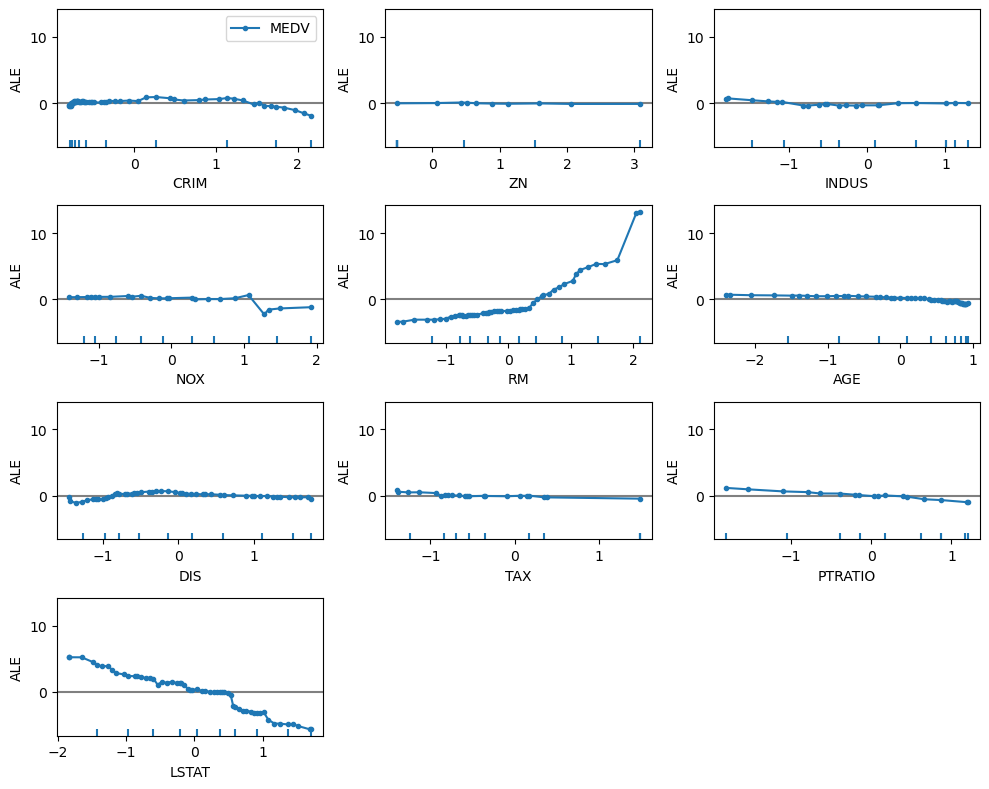

In [122]:
from alibi.explainers import ALE
from alibi.explainers.ale import plot_ale

features_names = X_train_sc.columns
rf_ale = ALE(rf.predict, #Methode predict de votre modèle
             feature_names=features_names, # Liste des features où il faut calculer l'ALE
             target_names=["MEDV"] # Nom de la target
) 

#Calcul des ALE, attention il faut un format numpy arrray
rf_exp = rf_ale.explain(X_train_sc.to_numpy()) 

#Plot pour l'interprétation
_, ax1 = plt.subplots(figsize = (10,8))
plot_ale(rf_exp, #Résultats des ALE
     features=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
       'PTRATIO', 'LSTAT'], # Feature à représenter
     ax= ax1, 
     targets=[0] # Si classification mutliple, passer le nom de toutes les modalités à prédire
)

L’interprétation du modèle est approfondie grâce aux Accumulated Local Effects (ALE). Cette approche permet d’évaluer l’impact des variables en prenant en compte leurs interactions. L’analyse montre que les variables ZN, INDUS, AGE et TAX n’ont pas d’effet significatif sur la prédiction, comme l’indique la forme plate de leur courbe ALE. Les variables CRIM, DIS et PTRATIO ont un effet modéré, tandis que RM présente une relation positive avec le prix et LSTAT une relation négative.

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor

array([[<Axes: xlabel='RAD_2', ylabel='ALE'>,
        <Axes: xlabel='RAD_3', ylabel='ALE'>,
        <Axes: xlabel='RAD_4', ylabel='ALE'>],
       [<Axes: xlabel='RAD_5', ylabel='ALE'>,
        <Axes: xlabel='RAD_6', ylabel='ALE'>,
        <Axes: xlabel='RAD_7', ylabel='ALE'>],
       [<Axes: xlabel='RAD_8', ylabel='ALE'>,
        <Axes: xlabel='RAD_24', ylabel='ALE'>,
        <Axes: xlabel='CHAS_1', ylabel='ALE'>]], dtype=object)

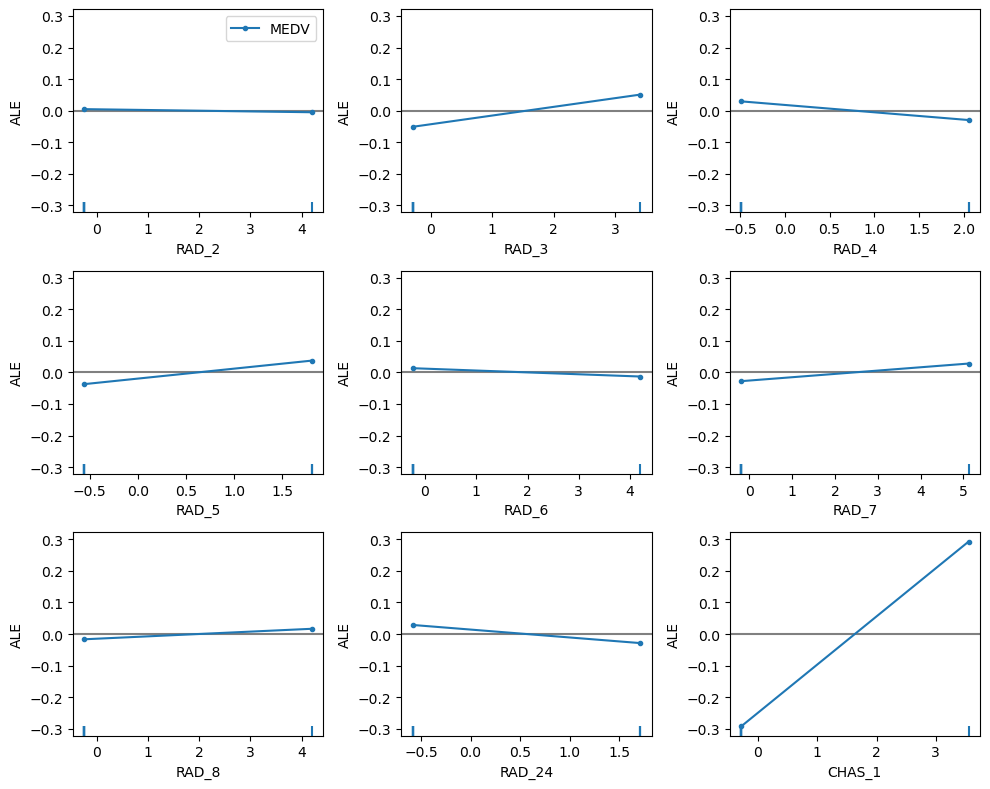

In [124]:
features_names = X_train_sc.columns
rf_ale = ALE(rf.predict, #Methode predict de votre modèle
             feature_names=features_names, # Liste des features où il faut calculer l'ALE
             target_names=["MEDV"] # Nom de la target
) 

#Calcul des ALE, attention il faut un format numpy arrray
rf_exp = rf_ale.explain(X_train_sc.to_numpy()) 

#Plot pour l'interprétation
_, ax1 = plt.subplots(figsize = (10,8))
plot_ale(rf_exp, #Résultats des ALE
     features=["RAD_2","RAD_3","RAD_4","RAD_5","RAD_6","RAD_7","RAD_8","RAD_24","CHAS_1"], # Feature à représenter
     ax= ax1, 
     targets=[0] # Si classification mutliple, passer le nom de toutes les modalités à prédire
)

Les variables qualitatives ont un effet assez faible, sauf pour CHAS_1.

In [126]:
from sklearn.inspection import permutation_importance

random_permutation = permutation_importance(rf, X_train_sc, y_train,
                                    n_repeats=15,
                                    random_state=0)

In [127]:
random_permutation.importances_mean

array([4.72014308e-02, 1.32011105e-03, 1.83580672e-02, 3.04676389e-02,
       3.65270369e-01, 1.78680373e-02, 3.99447428e-02, 1.27484066e-02,
       2.98427474e-02, 5.73617382e-01, 4.31286134e-03, 3.38683301e-04,
       5.26479337e-04, 4.46966173e-04, 7.95941645e-04, 1.22763991e-04,
       9.64044157e-05, 2.97789171e-04, 3.03579757e-03])

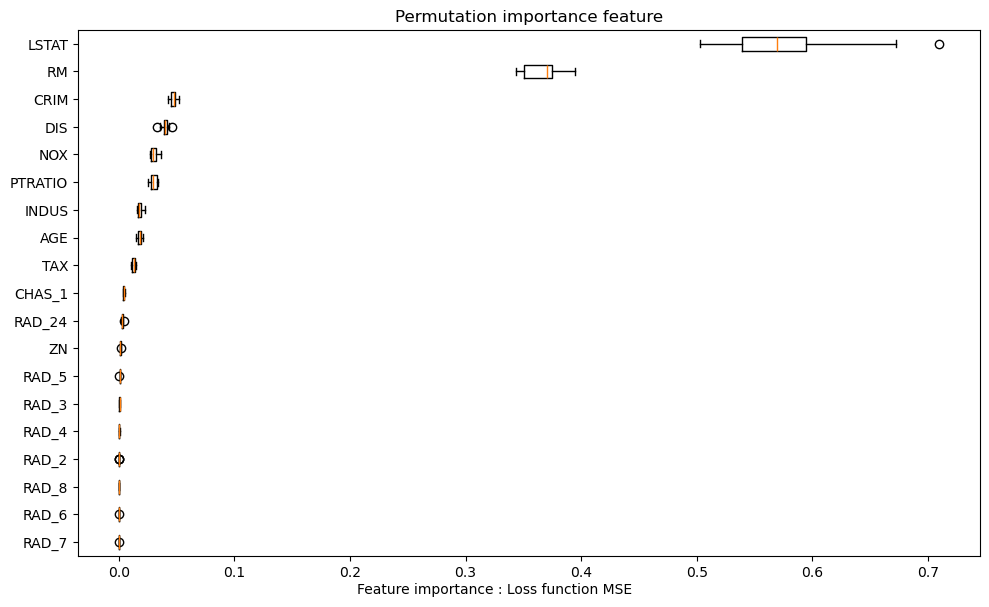

In [130]:
perm_sorted_idx = random_permutation.importances_mean.argsort()

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
ax1.boxplot(
    random_permutation.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx]
)
plt.title('Permutation importance feature')
fig.text(.5, .001, "Feature importance : Loss function MSE", ha='center')

fig.tight_layout()
plt.show()

L’importance des variables est également évaluée à l’aide de la permutation d’importance. Cette méthode permet de mesurer la contribution de chaque variable à la performance du modèle en perturbant leurs valeurs et en observant l’impact sur la fonction de perte. Les résultats confirment que LSTAT et RM sont les variables les plus influentes, ce qui corrobore les conclusions obtenues avec la régression linéaire. En revanche, l’impact des variables RAD, initialement fort en régression linéaire, apparaît moins marqué avec cette méthode.

### 7) Réaliser une explicabilité par individu sur le modèle RF
- 1) ICE, le PDP est-il une bonne représentation des variables importantes de votre modèle?
- 2) LIME
- 3) SHAP watterfall plot

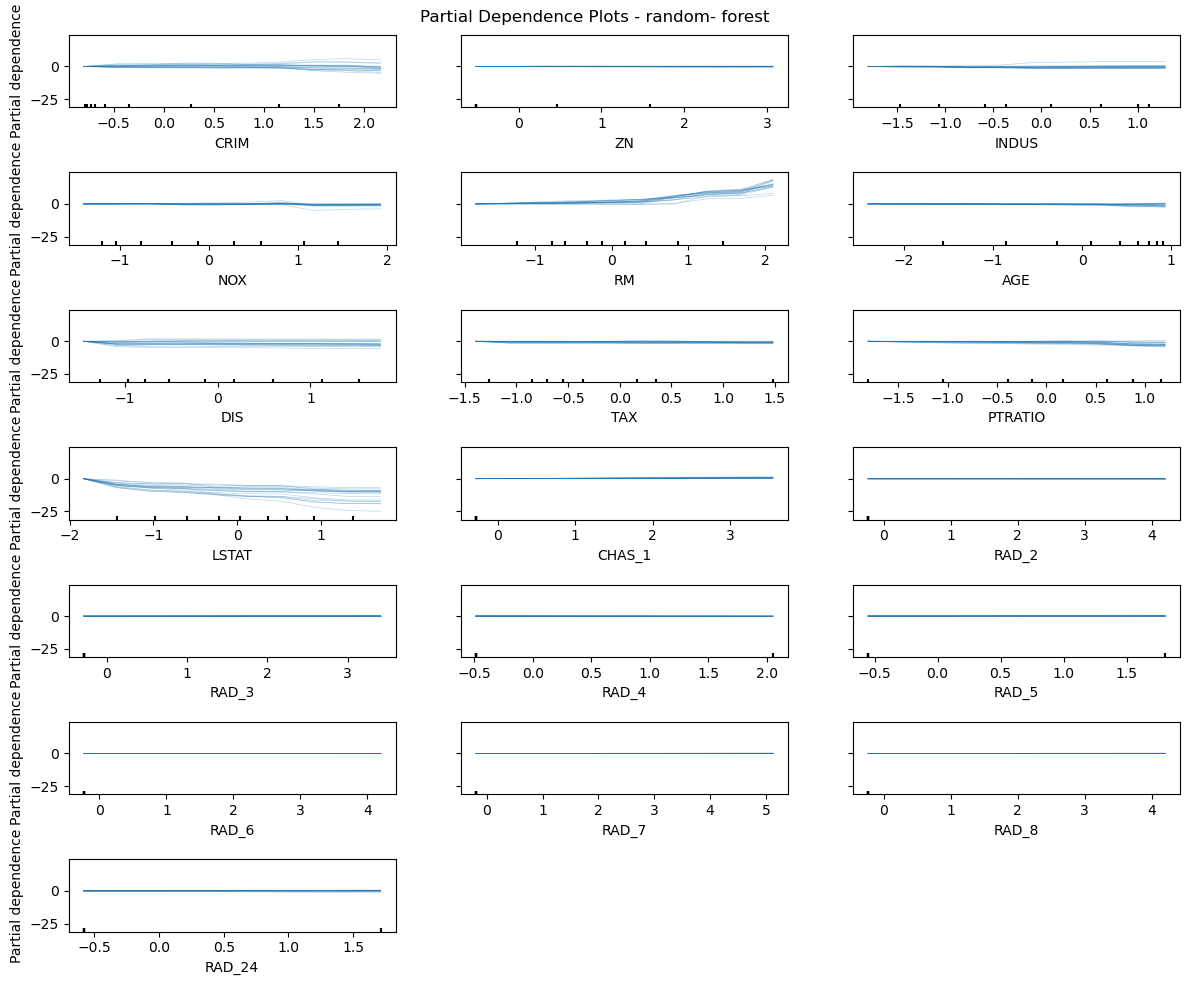

In [134]:
from sklearn.inspection import PartialDependenceDisplay

features_names = X_train_sc.columns
_, ax1 = plt.subplots(figsize = (12,10))
PartialDependenceDisplay.from_estimator(rf,  #votre modèle
                                         X_train_sc, 
                                         features_names,
                                         kind="individual", # On modifie ICI
                                         ax = ax1,
                                         grid_resolution=10, # Nombre de points estimés pour le tracer de la courbe
                                         n_cols=3,
                                         subsample=0.05, # 5% du jeu de données
                                         centered=True
                                         )
plt.suptitle("Partial Dependence Plots - random- forest")
plt.tight_layout()
plt.subplots_adjust(hspace=0.9, wspace=0.2)
plt.show()

CRIM, ZN, INDUS, NOX, AGE, DIS, TAX, PTRATIO, CHAS_1, RAD_2, RAD_3, RAD_4, RAD_5,RAD_6, RAD_7, RAD_8, RAD_24 ont une courbe qui reste horizontale, cela signifie que la variable correspondante n’a pas d’impact significatif sur la prédiction.

RM est une courbe ascendante indiquant une relation positive avec la cible, LSTAT est une courbe descendante traduit une relation négative avec le prix.

Pour toutes les variables les courbes ont la même allure, l'effet est alors similaire chez les différents individus.

In [136]:
import lime
import lime.lime_tabular
features_names = X_train_sc.columns
#Création de l'explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_sc.to_numpy(),  # Attention au format numpy array obligatoire
                                                   feature_names=features_names , #Nom des features du modèle
                                                   class_names=['cnt']  , #Variable à predire
                                                   verbose=True,
                                                     mode='regression' # Classification ou régression
                                                     )
# Index de l'individu à prédire
i = 3
# Résultat de l'explainer
# Résultat de l'explainer avec .iloc pour éviter le FutureWarning
exp = explainer.explain_instance(X_train_sc.iloc[i], rf.predict, num_features=5)

C:\Users\valor\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\valor\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning:

Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`

C:\Users\valor\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\valor\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not h

Intercept 23.24930001668615
Prediction_local [26.23314618]
Right: 22.689333333333305


In [138]:
# Importer la librairie Shap
import shap 

# Définir le module explainer de Shap, attention ce n'est pas le même si c'est un modèle basé sur des abres

explainer = shap.TreeExplainer(rf)

# On calcule les shap values, attention c'est très couteux en temps de calcul.
# On prend donc un échantillon

shap_values = explainer(X_train_sc.iloc[1:100])

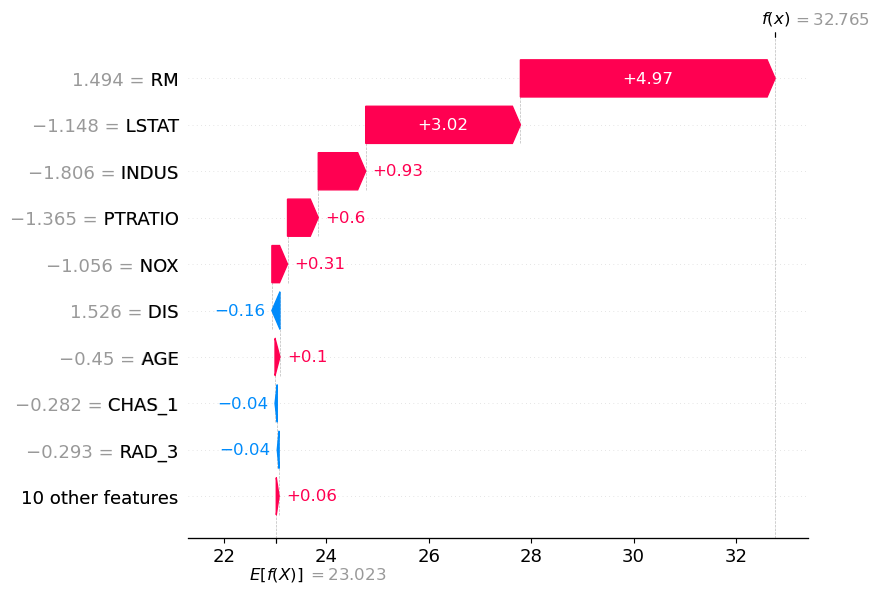

In [140]:
shap.initjs()
# visualize the first prediction's explanation
shap.waterfall_plot(shap_values[86])

L’interprétation locale des prédictions est réalisée avec SHAP (SHapley Additive Explanations). L’analyse de l'individu 86 spécifique montre que la valeur prédite de 32,7 milliers de dollars s’écarte de la moyenne de 11 milliers de dollars. L’analyse des contributions individuelles met en évidence que RM contribue à une augmentation de 4,9 milliers de dollars, tandis que LSTAT augmente la prédiction de 3 milliers de dollars.

### 8) Explorer les graphiques SHAP étudiés  dans la partie CM
   1) beeswarm (Contribution des variables)
   2) scatter (équivalent pdp)

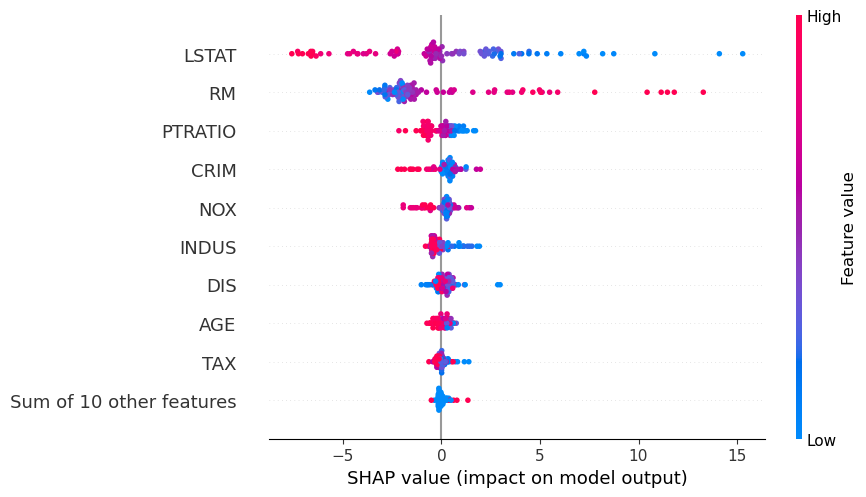

In [142]:
#Graphique beeswarm, interprétabilité globale 
shap.plots.beeswarm(shap_values)

Le graphique permet d’identifier les variables ayant le plus d’impact sur le prix des maisons. Il apparaît que LSTAT, RM, PTRATIO et CRIM sont les plus influentes. De plus, l’analyse des couleurs révèle que leur effet n’est pas monotone, ce qui signifie que leur influence varie en fonction de leurs valeurs respectives.

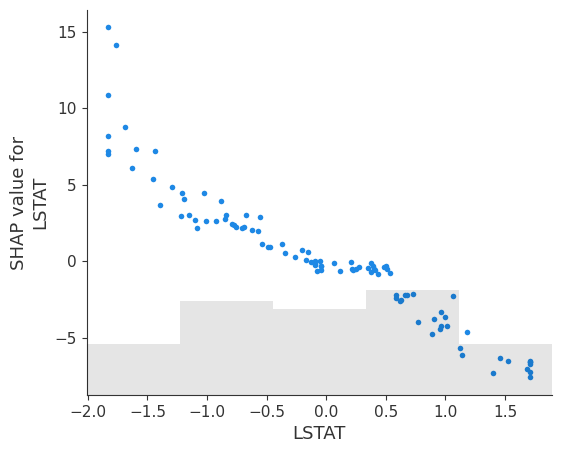

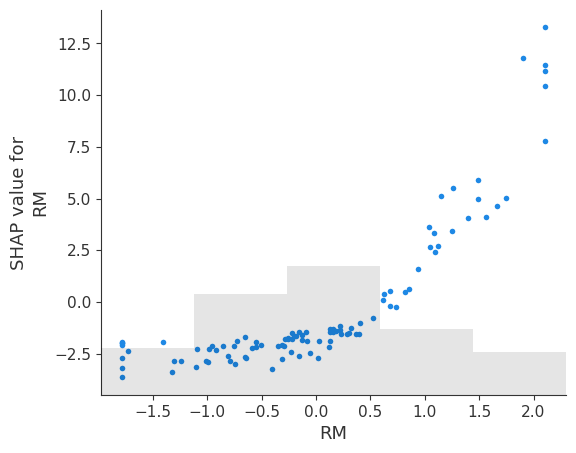

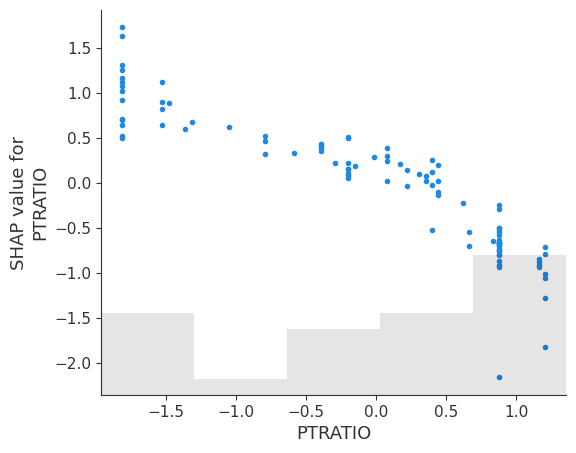

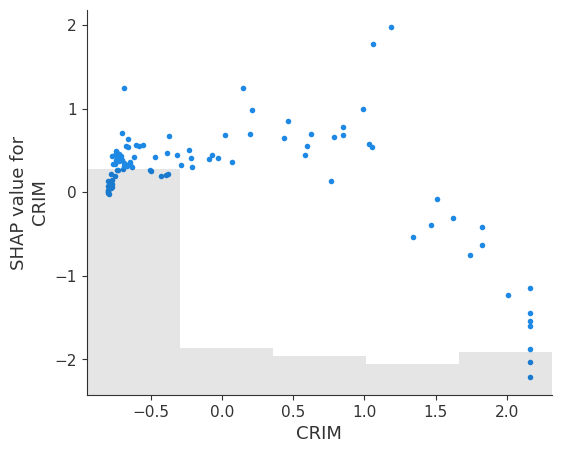

In [144]:
shap.plots.scatter(shap_values[:, 'LSTAT'])
shap.plots.scatter(shap_values[:, 'RM'])
shap.plots.scatter(shap_values[:, 'PTRATIO'])
shap.plots.scatter(shap_values[:, 'CRIM'])

Les graphiques précédents permettent de visualiser la manière dont chaque variable influence individuellement les prédictions du modèle. Concernant RM, la relation observée est positive. En effet, lorsque les valeurs de RM augmentent, les valeurs SHAP sont également croissantes, indiquant que cette variable contribue à augmenter la prédiction du prix des maisons. Pour LSTAT, PTRATIO et CRIM ont a une relation négative, lorsque les valeurs des variables augmentent, les valeurs SHAP diminuent, ce qui signifie que cette variable a un effet négatif sur le prix prédit.